In [1140]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1141]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
# from mpl_toolkits.mplot3d import Axes3D
# from itertools import product, combinations
import scipy.stats
# from scipy import interpolate
# from scipy.interpolate import griddata
# import scipy.fft

In [1142]:
# random para mantener el seed
def random(x,seed):
    np.random.seed(seed)
    if x == 1:
        return 2*(np.random.random()-0.5)
    else:
        return 2*(np.random.random(x)-0.5) 
    
# seed += 1

In [1143]:
# funsión para calcular la energía
def Energy(y):
    energy = 0
    omega = 1
    tau = 0.632

    for j in range(len(y)):
        if j == len(y)-1:
            k = 0
        else:
            k = j + 1
        d2 = (y[k] - y[j])**2
        dosc = y[k]*y[k]
        energy += 0.5 * omega * (d2 * tau +  dosc)
    
    return energy
    

In [1144]:
# ciclos = np.load('path.in')
nbead = 100
seed_0 = 42
size = 2.5
tau = 0.632
dely = 0.98 #delta y
omega = 1

In [1145]:
# load datos iniciales o crear un nuevo inicio
# en este caso solo cree un inicio con distribucion uniforme
yring = np.zeros(nbead)
yring = size * random(nbead,seed_0)
yring[nbead-1] = yring[0]

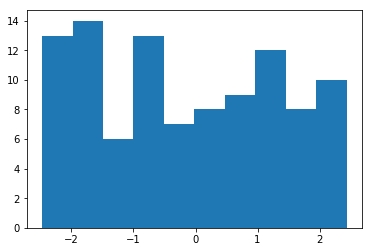

In [1146]:
plt.hist(yring,10);

In [1174]:
# yring va a ser el arreglo inicial, mientras que y lo estaremos manipulando (reinicia el proceso)
y = np.copy(yring)
# Energia inicial
e_old = Energy(yring)

count = 0 #contador de cilcos
count_w = 0 #contador de errores
seed = 43 #seed para el random
nmove = 100000 #numero de cilcos
E = []
E.append(e_old)

In [1180]:
# np.random.seed(seed)
# count = 0 #contador de cilcos
count_w = 0 #contador de errores
dely = 0.1
nmove = 100000
for i in range(nmove):
    which = int((np.random.random()*nbead)-0.5)
    if which == nbead-1:
        which = 0
    yold = np.copy(y[which])
#     count += 1
    
#  Mover el valor which randommente
    y[which] += dely * 2 * (np.random.random()-0.5)

#  limites periodicos
    if abs(y[which]) > size:
        if y[which] > 0:
            y[which] -= 2*size
        else:
            y[which] += 2*size
    y[nbead-1] = y[0]


# Ver si el movimiento es aceptado
    e_new = Energy(y)
    dE = e_new - e_old
    
    if dE > 0:   # cambio positivo en la energia
        boltz = np.exp(-tau*dE)
        
        if boltz < np.random.random():   # no se acepta
            count_w += 1
            y[which] = yold
            if which == 0:
                y[nbead-1] = y[0]
        else:   # se acepta el movimiento
            e_old = np.copy(e_new)
            E.append(e_old)
            count += 1
            
    else:   # cambio negativo en la energia
        e_old = np.copy(e_new)
        E.append(e_old)




In [1181]:
boltz

0.9826630482922182

2630 52943 100000


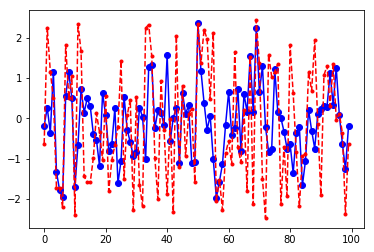

In [1182]:
plt.plot(y,'bo-');
plt.plot(yring,'r.--');
print(count_w,count,nmove)

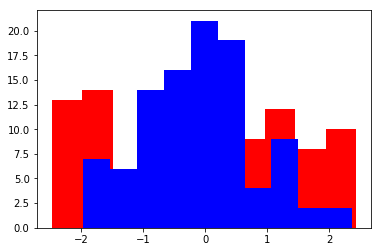

In [1183]:
plt.hist(yring,color='r');
plt.hist(y,color='b');


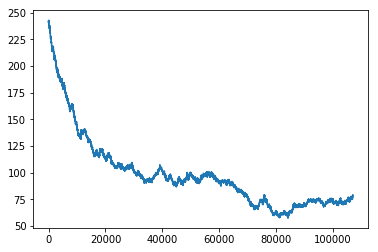

In [1184]:
plt.plot(E)